# Composição do Dataset: Tendências do Petróleo Brent


**Descrição:** Este notebook visa analisar os dados de preço do Petróleo Brent, bem como suas principais variações ao longo do tempo. Este tipo de petróleo bruto é extraído Oceano Atlântico Norte, mais precisamente no Mar do Norte, próximo à Noruega e Dinamarca. Cerca de dois terços de todos os contratos de petróleo bruto no mundo contem este petróleo, tornando-o uma referência em relação a sua precificação, sendo utilizado inclusive pela política de preços da Petrobrás. O estudo irá incluir análise estatística e a aplicação de técnica de Machine Learning com o intuito de prever o preço do petróleo diariamente.

## Importando as bibliotecas necessárias

In [29]:
# Bibliotecas para manipulação dos dados
import numpy as np
import pandas as pd


# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Importando a biblioteca ipeadatapy para acessar dados do Instituto de Pesquisa Econômica Aplicada (IPEA)
import ipeadatapy as ip 

# Importando a biblioteca yfinance para acessar dados financeiros do Yahoo Finance
import yfinance as yf 

#Ignorar todos os avisos gerados durante a execução
import warnings
warnings.filterwarnings('ignore')

## Importando os dados

### Preços Petróleo Brent (Dataset principal)

In [30]:
import ipeadatapy as ipea

ipea.list_series() # lista de séries disponíveis

,CODE,NAME
0,ABATE_ABPEAV,Abate - aves - peso das carcaças
1,ABATE_ABQUBV,Abate - bovinos - quantidade
2,ABATE12_ABPEVA12,Abate - vacas - peso das carcaças
3,ABATE12_ABQUBO12,Abate - bois - quantidade
4,ABATE12_ABQUBV12,Abate - bovinos - quantidade
...,...,...
3059,PNADCT_TXPARTCUF_SI,Taxa de participação - sem instrução ou equiva...
3060,PNAD_IAGRV,Domicílios com insegurança alimentar grave
3061,PNAD_IALEV,Domicílios com insegurança alimentar leve
3062,PNAD_IAMOD,Domicílios com insegurança alimentar moderada


## Limpeza e preparação dos dados

In [31]:
# Código da tabela com os preços do petróleo Brent no IPEA
ipea_table_code = 'EIA366_PBRENT366'

# Coleta dos dados
df_brent = ip.timeseries(ipea_table_code)[['VALUE (US$)']]

# Definindo o nome do índice como 'data'
df_brent.index.name = 'data'

# Renomeação da coluna para 'valor'
df_brent.columns = ['preco']

df_brent


,preco
data,
1986-01-04,NaN
1986-01-05,NaN
1986-01-06,NaN
1986-01-07,NaN
1986-01-08,NaN
...,...
2024-11-19,74.32
2024-11-20,74.33
2024-11-21,75.09


In [32]:
# Retirar valores ausentes da base 
df_brent = df_brent.dropna()

df_brent

,preco
data,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2024-11-19,74.32
2024-11-20,74.33
2024-11-21,75.09


In [33]:
df_brent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11307 entries, 1987-05-20 to 2024-11-25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preco   11307 non-null  float64
dtypes: float64(1)
memory usage: 176.7 KB


In [34]:
df_brent.shape

(11307, 1)

In [36]:
#Reset no index
df_brent = df_brent.reset_index('data')
df_brent['data'] = pd.to_datetime(df_brent['data']) #realizando a conversão da data para formato datetime
df_brent.head()

,data,preco
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [37]:
# Incluir campos de Ano, Mês 

df_brent['ano'] = df_brent['data'].dt.year
df_brent['mes'] = df_brent['data'].dt.month


In [38]:
df_brent.head()

,data,preco,ano,mes
0,1987-05-20,18.63,1987,5
1,1987-05-21,18.45,1987,5
2,1987-05-22,18.55,1987,5
3,1987-05-25,18.60,1987,5
4,1987-05-26,18.63,1987,5


Análise Exploratória de Dados (EDA)

In [ ]:
# Estatística Básica

df_brent.describe()

,preco
count,11307.000000
mean,53.339940
std,33.151598
min,9.100000
25%,20.630000
50%,48.960000
75%,76.770000
max,143.950000


### Evolução do Petróleo Brent ao longo do tempo

No gráfico abaixo, é possível observar períodos de grandes variações nos preços ao longo dos últimos seis anos. Neste notebook, realizaremos uma análise detalhada dos seguintes pontos:

* A queda dos preços em 2020 devido ao impacto da pandemia de Covid-19.
* A recuperação do valor do barril em 2021.
* O aumento acentuado dos preços em 2022.
* A alta dos preços no final de 2023.
* A continuidade da subida dos preços em 2024.

No segundo gráfico (bloxplot) podemos observar uma grande quantidade de outiliers no ano de 2022.

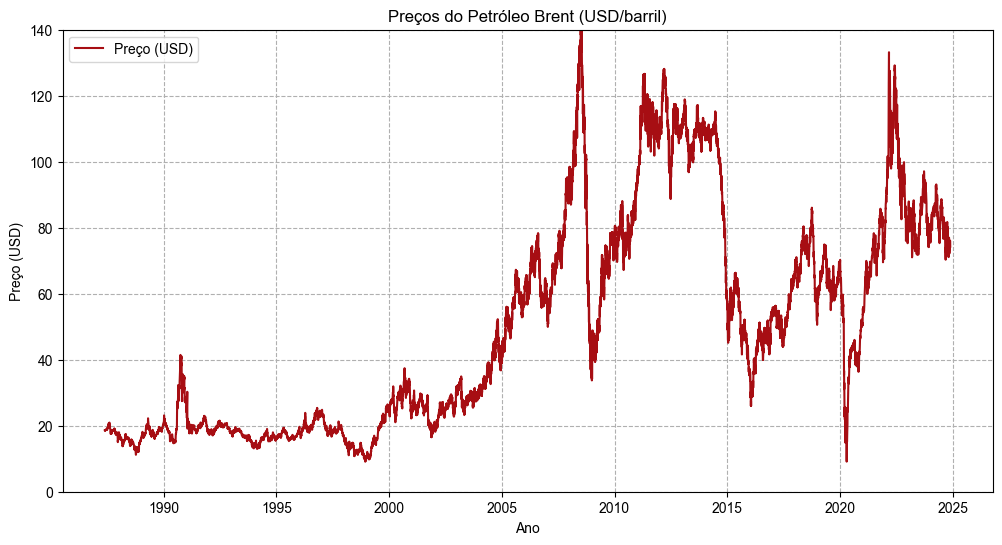

In [ ]:
# Configurar dimensão e grid
plt.figure(figsize=(12, 6))
plt.grid(linestyle="--")

# Criar gráfico de linha
sns.lineplot(x="data", y="preco", data=df_brent, color="#A70E13", label="Preço (USD)")
sns.set_style("whitegrid")

# Adicionar título e rótulos
plt.title("Preços do Petróleo Brent (USD/barril)")
plt.xlabel("Ano")
plt.ylabel("Preço (USD)")
plt.ylim(0, 140)

plt.show()

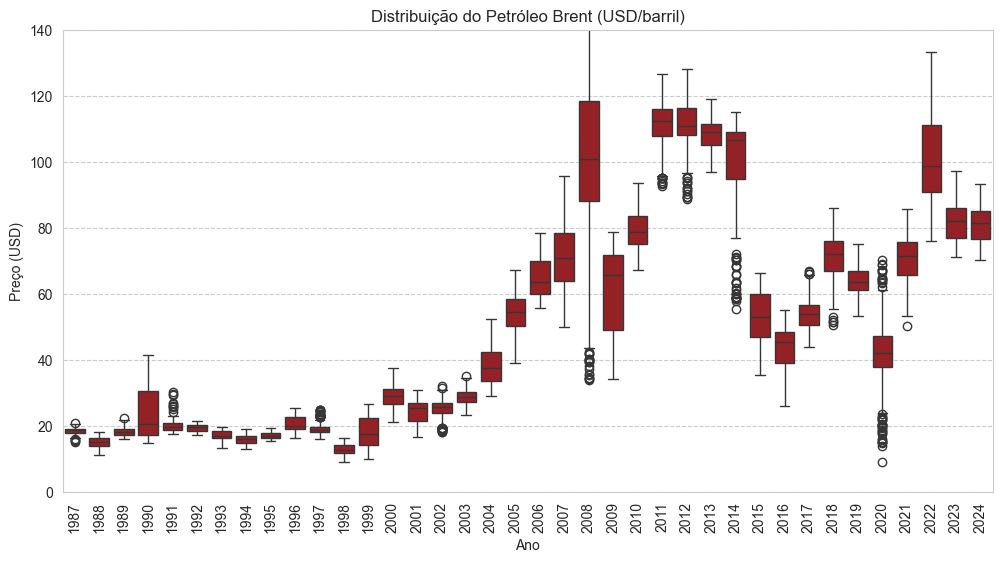

In [40]:
# Configurar dimensão e grid
plt.figure(figsize=(12, 6))
plt.grid(linestyle="--")


# Criar o gráfico de caixa
sns.boxplot(x="ano", y="preco", color="#A70E13", data=df_brent)
sns.set_style("whitegrid")


# Adicionar título e rótulos
plt.title("Distribuição do Petróleo Brent (USD/barril)")
plt.xlabel("Ano")
plt.ylabel("Preço (USD)")
plt.ylim(0, 140)

# Rotacionar a legenda do eixo X para a vertical
plt.xticks(rotation=90)


plt.show()


### 2020: Impactos da Covid-19

No começo de março, mais precisamente em 11/03/2020, a COVID-19 foi classificada pela OMS como pandemia. Naquele momento, houve o reconhecimento de que o surto desta doença estava espalhado por várias regiões no mundo.

Isto acarretou em diversas mudanças abruptas nos mercados globais. Como o petróleo bruto é uma das commodities mais negociadas no mundo, seu preço sofreu uma queda drástica.

Como podemos verificar no segundo gráfico, a média de preço negociada no mês de abr/20 foi de US 18.47. Com uma redução de 74,1% comparado ao mesmo periodo do ano anterior, onde o barril estava com uma média de negóciação de US$ 71,26.

In [43]:
# Filtro do período da Covid
selecao = df_brent['data'].dt.year == 2020

df_brent_2022 = df_brent[selecao]

In [44]:
df_brent_2022.head()

,data,preco,ano,mes
10059,2020-01-02,67.05,2020,1
10060,2020-01-03,69.08,2020,1
10061,2020-01-06,70.25,2020,1
10062,2020-01-07,68.74,2020,1
10063,2020-01-08,67.31,2020,1


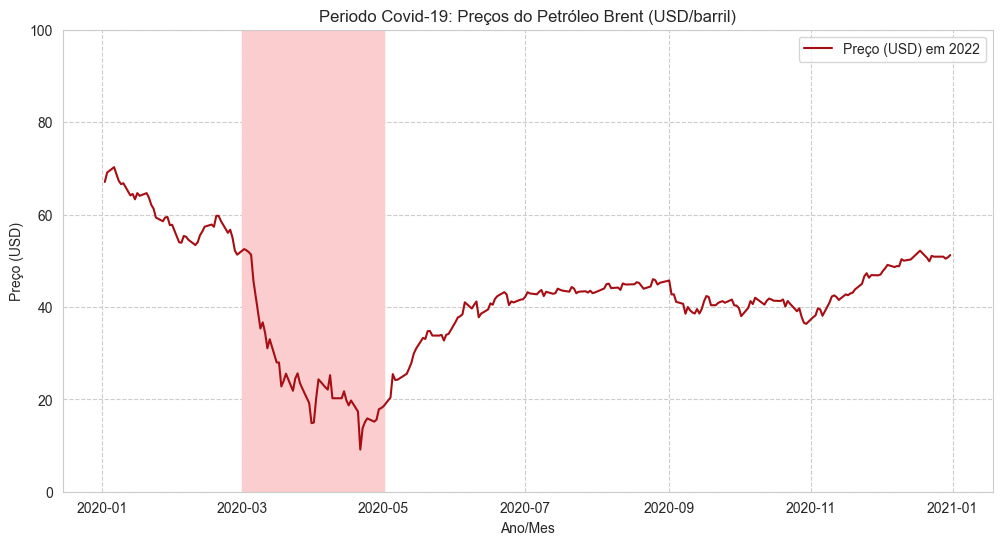

In [45]:
# Configurar dimensão e grid
plt.figure(figsize=(12, 6))
plt.grid(linestyle="--")


# Plotar gráfico de linha
sns.lineplot(x="data", y="preco", data=df_brent_2022, color="#A70E13", label="Preço (USD) em 2022")
sns.set_style("whitegrid")

# Adicionar um vspan para destacar o período de maior queda de preço
plt.axvspan('2020-03-01','2020-05-01', color="#FBCDCE")


# Adicionar título e rótulos
plt.title("Periodo Covid-19: Preços do Petróleo Brent (USD/barril)")
plt.xlabel("Ano/Mes")
plt.ylabel("Preço (USD)")
plt.ylim(0, 100)

plt.show()

In [48]:
# Filtro com 2019 para efeito de comparação
selecao_19_20 = df_brent['data'].dt.year.isin([2019, 2020])

# Aplicar o filtro no DataFrame
df_19_20 = df_brent[selecao_19_20]


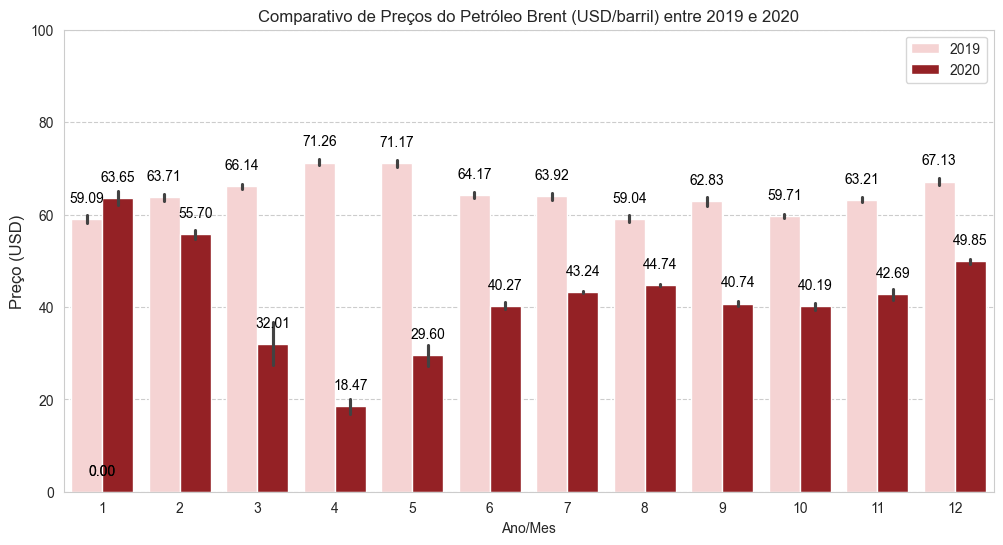

In [49]:
# Criando figura e eixo para o gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
plt.grid(linestyle="--")

# Definindo a paleta de cores para 2019 e 2020
palette = {2019: '#FBCDCE', 2020: '#A70E13'}

# Criando um grafico de barrar por ano
sns.barplot(x="mes", y="preco", data=df_19_20, hue="ano" , palette=palette, ax=ax)
sns.set_style("whitegrid")

# Adicionando o preço nas barras
for i in ax.patches:
    ax.annotate(f'{i.get_height():.2f}',  # Exibir o preço do petroleo com duas casas decimais
                (i.get_x() + i.get_width() / 2., i.get_height()),  # Posição: meio da barra
                ha='center', va='center',  # Alinhamento do texto
                fontsize=10, color='black',  # Tamanho e cor do texto
                xytext=(0,15),  # Distância do texto da barra
                textcoords='offset points')

# Adicionando as legendas
plt.title("Comparativo de Preços do Petróleo Brent (USD/barril) entre 2019 e 2020", fontsize=12)
plt.xlabel("Ano/Mes", fontsize=10)
plt.ylabel("Preço (USD)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.ylim(0, 100)

plt.show()

## Biblioteca yfinance - Bolsa de Valores